# P5.2 - Classification hiérarchique

<h1>Table des matières<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Initialisation-et-importation" data-toc-modified-id="Initialisation-et-importation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Initialisation et importation</a></span></li><li><span><a href="#Analyses-bivariées" data-toc-modified-id="Analyses-bivariées-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Analyses bivariées</a></span><ul class="toc-item"><li><span><a href="#Hitmap-des-corrélations" data-toc-modified-id="Hitmap-des-corrélations-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Hitmap des corrélations</a></span><ul class="toc-item"><li><span><a href="#Matrice" data-toc-modified-id="Matrice-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Matrice</a></span></li><li><span><a href="#Hitmap" data-toc-modified-id="Hitmap-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Hitmap</a></span></li></ul></li><li><span><a href="#Dispersion-(6-variables-retenues)" data-toc-modified-id="Dispersion-(6-variables-retenues)-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Dispersion (6 variables retenues)</a></span></li></ul></li><li><span><a href="#Classification-ascendante-hiérarchique" data-toc-modified-id="Classification-ascendante-hiérarchique-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Classification ascendante hiérarchique</a></span><ul class="toc-item"><li><span><a href="#Dendrogramme" data-toc-modified-id="Dendrogramme-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Dendrogramme</a></span></li><li><span><a href="#Coupe-à-cinq-clusters" data-toc-modified-id="Coupe-à-cinq-clusters-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Coupe à cinq clusters</a></span></li><li><span><a href="#Export-des-fichiers-csv" data-toc-modified-id="Export-des-fichiers-csv-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Export des fichiers csv</a></span></li></ul></li><li><span><a href="#Analyse-des-clusters" data-toc-modified-id="Analyse-des-clusters-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Analyse des clusters</a></span><ul class="toc-item"><li><span><a href="#Analyse-par-cluster" data-toc-modified-id="Analyse-par-cluster-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Analyse par cluster</a></span></li><li><span><a href="#Analyse-des-centroides" data-toc-modified-id="Analyse-des-centroides-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Analyse des centroides</a></span><ul class="toc-item"><li><span><a href="#Calcul-des-centroides" data-toc-modified-id="Calcul-des-centroides-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Calcul des centroides</a></span></li><li><span><a href="#Statistiques-descriptives" data-toc-modified-id="Statistiques-descriptives-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>Statistiques descriptives</a></span></li></ul></li><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Conclusions</a></span></li></ul></li></ul></div>

## Initialisation et importation

In [1]:
import numpy as np                # linear algebra
import pandas as pd               # data frames
import seaborn as sns             # visualizations
import matplotlib.pyplot as plt   # visualizations

from sklearn import preprocessing
from sklearn.decomposition import PCA

In [2]:
# sépatateurs milliers = , -- 1 décimale après
pd.options.display.float_format = '{:,.1f}'.format

In [3]:
# import des données 
data = pd.read_csv('data/df_maxi.csv', index_col = 0)
data.describe()

,pop_2013,pop_var,gdp_2013,edb_2019,food_kcal_cap_day,prot_g_cap_day,prot_ani_ratio,poultry_food_kg_cap_y,poultry_import_ratio
count,164.0,164.0,164.0,164.0,164.0,164.0,164.0,164.0,164.0
mean,42.0,107.4,"14,104.7",63.7,"2,850.4",81.1,42.4,20.3,38.1
std,149.8,6.8,"19,645.9",12.4,443.5,20.3,16.2,16.4,41.1
min,0.1,95.9,314.7,30.6,"1,879.0",37.7,9.8,0.4,0.0
25%,2.9,102.9,"1,832.7",55.1,"2,523.2",63.8,27.9,6.4,3.5
50%,9.5,106.6,"6,093.5",63.3,"2,821.5",80.9,45.1,18.2,26.0
75%,29.1,111.3,"15,801.9",73.7,"3,223.0",96.0,56.1,27.6,67.4
max,"1,385.6",140.0,"113,341.2",86.6,"3,770.0",133.1,73.1,73.4,264.1


## Analyses bivariées
### Hitmap des corrélations
#### Matrice

In [4]:
# corrélations, matrice à 9 variables
corr = data.iloc[:,0:].corr()
corr

,pop_2013,pop_var,gdp_2013,edb_2019,food_kcal_cap_day,prot_g_cap_day,prot_ani_ratio,poultry_food_kg_cap_y,poultry_import_ratio
pop_2013,1.0,-0.1,-0.0,0.1,0.0,0.0,-0.1,-0.1,-0.2
pop_var,-0.1,1.0,-0.2,-0.4,-0.4,-0.4,-0.5,-0.2,0.0
gdp_2013,-0.0,-0.2,1.0,0.6,0.6,0.6,0.6,0.4,0.1
edb_2019,0.1,-0.4,0.6,1.0,0.7,0.7,0.6,0.3,-0.0
food_kcal_cap_day,0.0,-0.4,0.6,0.7,1.0,0.9,0.6,0.4,0.1
prot_g_cap_day,0.0,-0.4,0.6,0.7,0.9,1.0,0.7,0.5,0.1
prot_ani_ratio,-0.1,-0.5,0.6,0.6,0.6,0.7,1.0,0.7,0.3
poultry_food_kg_cap_y,-0.1,-0.2,0.4,0.3,0.4,0.5,0.7,1.0,0.2
poultry_import_ratio,-0.2,0.0,0.1,-0.0,0.1,0.1,0.3,0.2,1.0


#### Hitmap

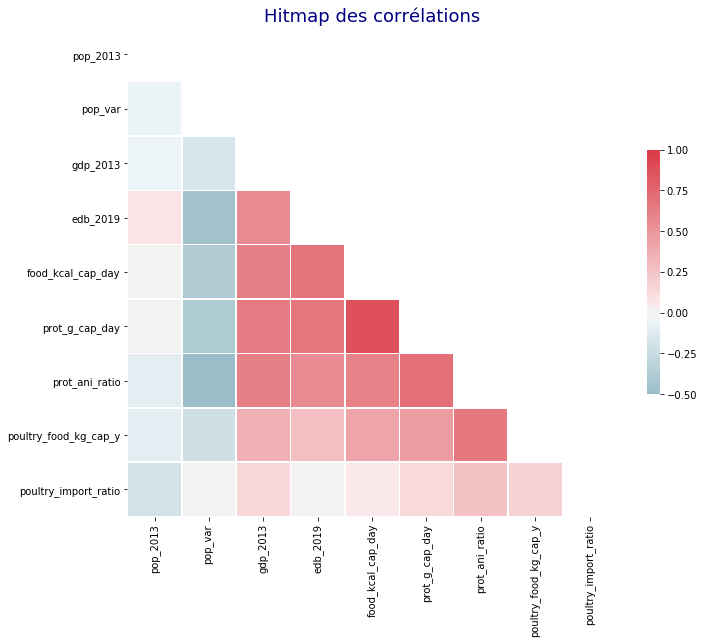

In [5]:
# affichage du graphique
mask = np.zeros_like(corr, dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

# déclaration du tableau
f, ax = plt.subplots(figsize=(11, 9)) 

# palette de couleurs
cmap = sns.diverging_palette(220, 10, as_cmap=True) 

# hitmap
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Hitmap des corrélations', size=18, color='navy')
plt.savefig('img/P5.2_hitmap.png', dpi=120, bbox_inches='tight')

plt.show()
plt.close()

**Analyse**<br>
* 'edb_2019', 'food_kcal_cap_day', 'prot_g_cap_day', 'prot_ani_ratio' et 'poultry_food_kg_cap_y' sont plus ou moins positivement corrélées.
* 'pop_2013' et 'poultry_import_ratio' sont proches d'une absence de corrélation avec les autres variables
* 'pop_var' paraît plutôt être anti-corrélée avec les autres variables
* Pour une lecture plus commode du diagramme de dispersion, nous retirons ces 3 dernières variables

### Dispersion (6 variables retenues)

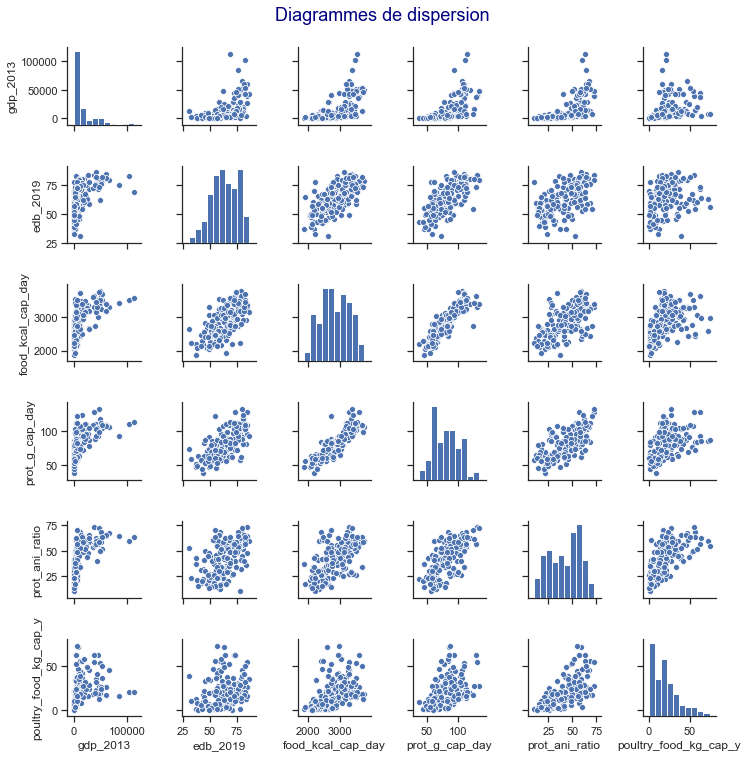

In [6]:
# pairplot des 5 variables significatives
sns.set(style="ticks", color_codes=True)

# déclaration du tableau
p = sns.pairplot(data,  vars=['gdp_2013','edb_2019','food_kcal_cap_day', 'prot_g_cap_day',
                             'prot_ani_ratio','poultry_food_kg_cap_y'], height=1.7)

p.fig.suptitle('Diagrammes de dispersion', y=1.03, size=18, color='navy')
plt.savefig('img/P5.2_pairplot.png', dpi=120, bbox_inches='tight')

plt.show()
plt.close()

**Analyse**<br>
* Mis à part pour 'gdp_2013', on peut confirmer une corrélation plus ou moins élevée entre ces variables
* Pour ces valeurs, une régresion linéaire semble possible

## Classification ascendante hiérarchique

### Dendrogramme

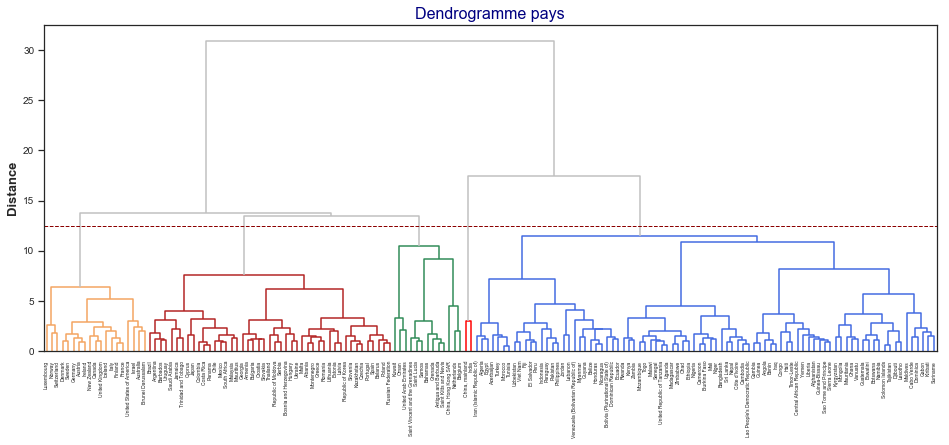

In [7]:
from scipy.cluster import hierarchy

# préparation des données pour le clustering
X = data.values
ctry = data.index

# centrage et réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# clustering hiérarchique
C = hierarchy.linkage(X_scaled, 'ward')

# palette de couleurs
hierarchy.set_link_color_palette(['sandybrown', 'firebrick', 'seagreen', 'red', 'royalblue'])

# affichage du dendrogramme
plt.figure(figsize=(16,6))
plt.axhline(12.5, lw=1, linestyle='dashed', color = 'darkred')

# contruction de la hiérarchie  attribution des couleurs en-dessous du seuil
hierarchy.dendrogram(C, labels = ctry, orientation='top', show_contracted=True, 
                     color_threshold=12.5, above_threshold_color='silver')

plt.title('Dendrogramme pays', size=16, color='navy')
plt.ylabel('Distance',size=13, fontweight='bold')
plt.yticks(size=10)

plt.savefig('img/P5.2_dendro1.png', 
            dpi=120, bbox_inches='tight')
plt.show()
plt.close()                      

**Analyse**<br>
* Au regard de ce graphique, la coupe en 5 clusters semble la plus pertinente.
* La coupe à 6 clusters divisant le groupe bleu en deux ne devrait guère apporter de précision vu leur proximité (solution testée)
* Le cluster 4 n'a que deux pays (China, India). Leur poids est probablement dû à une population très au-dessus de la moyenne

### Coupe à cinq clusters

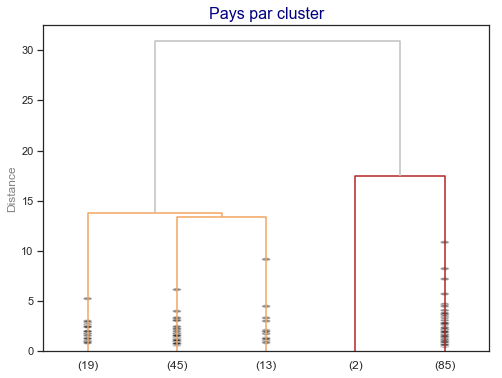

In [8]:
# dendrogramme
plt.figure(figsize=(8,6))
hierarchy.dendrogram(C, truncate_mode='lastp', p=5, show_contracted=True, 
                     color_threshold=20, above_threshold_color='silver')
plt.title('Pays par cluster', fontsize=16, color='navy')
plt.ylabel('Distance', size=12,color ='grey')

plt.savefig('img/P5.2_dendro2.png', dpi=120, bbox_inches='tight')

plt.show()
plt.close()

In [9]:
from scipy.cluster.hierarchy import linkage, fcluster

# découpage en 5 clusters
clusters = fcluster(C,5, criterion='maxclust')
dfgp=pd.DataFrame({'country':ctry, 'cl':clusters})

# ajout de la colonne clusters
data['clust']=clusters
data.head(1)

,pop_2013,pop_var,gdp_2013,edb_2019,food_kcal_cap_day,prot_g_cap_day,prot_ani_ratio,poultry_food_kg_cap_y,poultry_import_ratio,clust
country,,,,,,,,,,
Armenia,3.0,100.0,"3,843.6",75.4,"2,924.0",90.1,48.0,13.4,80.0,2


### Export des fichiers csv

In [10]:
# export du df 'clust_key'
clust_key = data[['clust']].copy()
clust_key.to_csv('data/clustkey_it1.csv')

In [11]:
# export du df 'data'
data.to_csv('data/data_it1.csv')

In [12]:
# création d'un df par cluster
cl1=data.groupby('clust').get_group(1) 
cl2=data.groupby('clust').get_group(2) 
cl3=data.groupby('clust').get_group(3) 
cl4=data.groupby('clust').get_group(4)
cl5=data.groupby('clust').get_group(5)

In [13]:
# export des clusters
cl1.to_csv('data/cl1.csv')
cl2.to_csv('data/cl2.csv')
cl3.to_csv('data/cl3.csv')
cl4.to_csv('data/cl4.csv')
cl5.to_csv('data/cl5.csv')

## Analyse des clusters

### Analyse par cluster

In [14]:
# sélectionez un cluster pour l'afficher (cl1-cl5)
cl1.describe()

,pop_2013,pop_var,gdp_2013,edb_2019,food_kcal_cap_day,prot_g_cap_day,prot_ani_ratio,poultry_food_kg_cap_y,poultry_import_ratio,clust
count,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0
mean,37.4,104.7,"57,008.9",78.7,"3,434.7",108.3,61.0,30.4,28.6,1.0
std,73.3,2.7,"21,334.1",4.6,193.3,10.4,4.9,14.8,27.7,0.0
min,0.3,99.2,"35,705.8",69.0,"2,985.0",92.4,52.1,16.3,0.0,1.0
25%,4.8,102.5,"43,545.8",76.5,"3,366.0",104.1,57.9,19.3,4.7,1.0
50%,8.1,105.3,"50,137.5",79.3,"3,482.0",108.5,60.6,26.2,17.5,1.0
75%,48.1,106.6,"60,566.4",82.0,"3,559.0",110.6,64.0,35.9,46.3,1.0
max,320.1,108.8,"113,341.2",86.6,"3,770.0",133.1,72.5,62.5,90.9,1.0


In [15]:
# sélectionez un cluster pour l'afficher (cl1-cl5) - head, count, etc.
cl1.head(1)

,pop_2013,pop_var,gdp_2013,edb_2019,food_kcal_cap_day,prot_g_cap_day,prot_ani_ratio,poultry_food_kg_cap_y,poultry_import_ratio,clust
country,,,,,,,,,,
Australia,23.3,107.8,"66,301.3",80.1,"3,278.0",106.3,67.5,46.1,1.6,1


### Analyse des centroides
#### Calcul des centroides

In [16]:
# création du df
centroides = data.groupby('clust').mean()

# Export du df 'centroides'
centroides.to_csv('data/centroides.csv')
centroides

,pop_2013,pop_var,gdp_2013,edb_2019,food_kcal_cap_day,prot_g_cap_day,prot_ani_ratio,poultry_food_kg_cap_y,poultry_import_ratio
clust,,,,,,,,,
1,37.4,104.7,"57,008.9",78.7,"3,434.7",108.3,61.0,30.4,28.6
2,27.1,101.6,"14,038.2",72.1,"3,086.4",90.7,52.2,26.1,30.9
3,4.0,110.9,"25,496.8",65.7,"2,976.0",93.0,59.5,48.3,115.4
4,"1,318.9",104.9,"4,233.6",70.4,"2,783.0",79.0,30.0,7.5,1.6
5,26.7,110.6,"3,039.4",55.3,"2,577.3",68.2,30.8,11.1,33.0


#### Statistiques descriptives

In [17]:
# rappel des statistiques descriptives globales : observation des centroides vs statistiques descriptives
data.drop(['clust'], axis=1, inplace = True)
data.describe()

,pop_2013,pop_var,gdp_2013,edb_2019,food_kcal_cap_day,prot_g_cap_day,prot_ani_ratio,poultry_food_kg_cap_y,poultry_import_ratio
count,164.0,164.0,164.0,164.0,164.0,164.0,164.0,164.0,164.0
mean,42.0,107.4,"14,104.7",63.7,"2,850.4",81.1,42.4,20.3,38.1
std,149.8,6.8,"19,645.9",12.4,443.5,20.3,16.2,16.4,41.1
min,0.1,95.9,314.7,30.6,"1,879.0",37.7,9.8,0.4,0.0
25%,2.9,102.9,"1,832.7",55.1,"2,523.2",63.8,27.9,6.4,3.5
50%,9.5,106.6,"6,093.5",63.3,"2,821.5",80.9,45.1,18.2,26.0
75%,29.1,111.3,"15,801.9",73.7,"3,223.0",96.0,56.1,27.6,67.4
max,"1,385.6",140.0,"113,341.2",86.6,"3,770.0",133.1,73.1,73.4,264.1


### Conclusions

* __Clust1__ (19) - GDP élevé (parmi les 25% les plus élevés), régime calorique et protéique élevé, forte consommation annuelle de volaille
* __Clust2__ (45) - GDP dans la moyenne (et 3e quartile), rations caloriques et protéiques dans la norme et consommation de volaille dans le 3e quartile
* Clust3 (13) - Faible population, GDP dans le top 25%, proportion élevée de protéine animale et de consommation de volaille
* ~~Clust4~~ (2) - Très forte population (Chine, Inde), consommation de volaille très en-dessous de la moyenne et de la médiane, faible GDP, seulement 2 pays
* ~~Clust5~~ (85) - Faible GDP, indicateur 'Ease of Doing Business' faible, faible consommation de volailles


* Les clust 1 et 2 sont les plus intéressants
* Le clust 3 est à observer
* Les clust 4 et 5 peuvent être exclus